In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('multinode_results_WEAK2025-09-02_140208.csv')
df

,nodes,x,y,time,wall_time
0,16,160000,10000,30.89,30.904123
1,8,80000,10000,32.43,32.435580
2,4,40000,10000,30.51,30.523222
3,2,20000,10000,31.11,31.121909
4,1,10000,10000,33.84,33.846375


In [7]:
baseline_wall_time = df.loc[df['nodes'] == 1, 'wall_time'].values[0]
baseline_wall_time

np.float64(33.846375133)

In [8]:
df['efficiency'] = df['wall_time']/baseline_wall_time

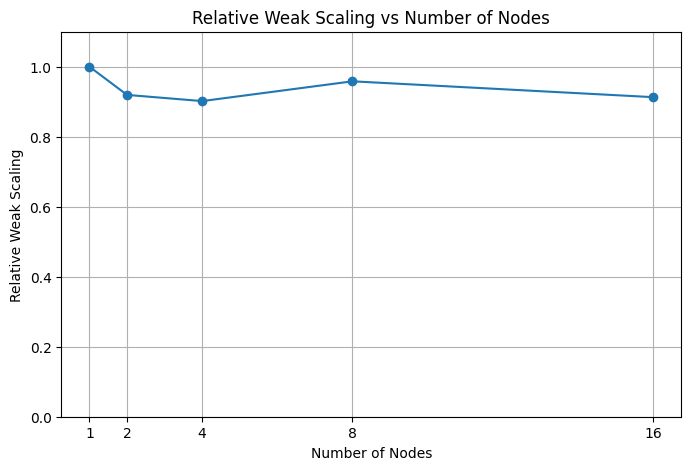

In [9]:
plt.figure(figsize=(8,5))
plt.plot(df['nodes'], df['efficiency'], marker='o', linestyle='-')
plt.xlabel('Number of Nodes')
plt.ylabel('Relative Weak Scaling')
plt.title('Relative Weak Scaling vs Number of Nodes')
plt.grid(True)
plt.xticks(df['nodes'])
plt.ylim(0, max(df['efficiency'])*1.1)
plt.show()

In [2]:
df=pd.read_csv('multinode_results_STRONG2025-09-02_140208.csv')
df

,nodes,x,y,time,wall_time
0,16,10000,10000,5.11,5.121981
1,8,10000,10000,8.88,8.888396
2,4,10000,10000,13.69,13.698762
3,2,10000,10000,18.26,18.269961
4,1,10000,10000,32.93,32.939342


In [3]:
baseline_wall_time = df.loc[df['nodes'] == 1, 'wall_time'].values[0]
baseline_wall_time

np.float64(32.939341679)

In [4]:
df['speedup'] = baseline_wall_time / df['wall_time']
df['efficiency'] = df['speedup'] / df['nodes']

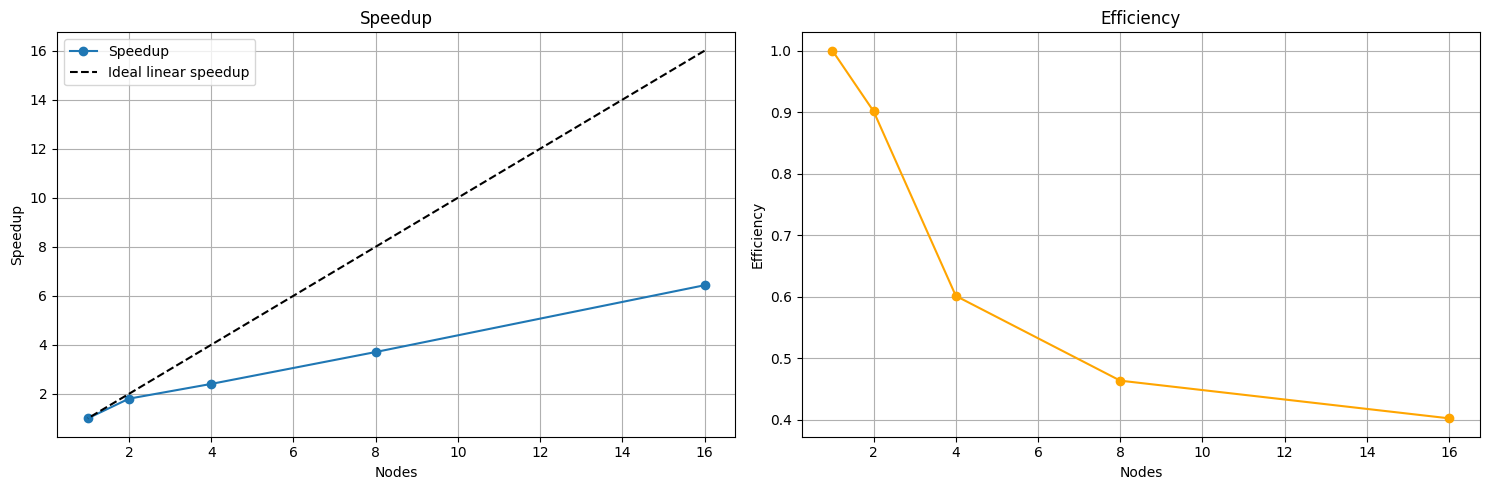

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(df['nodes'], df['speedup'], marker='o', label='Speedup')
axs[0].plot(df['nodes'], df['nodes'], 'k--', label='Ideal linear speedup')
axs[0].set_xlabel('Nodes')
axs[0].set_ylabel('Speedup')
axs[0].set_title('Speedup')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(df['nodes'], df['efficiency'], marker='o', color='orange', label='Efficiency')
axs[1].set_xlabel('Nodes')
axs[1].set_ylabel('Efficiency')
axs[1].set_title('Efficiency')
axs[1].grid(True)

plt.tight_layout()
plt.show()